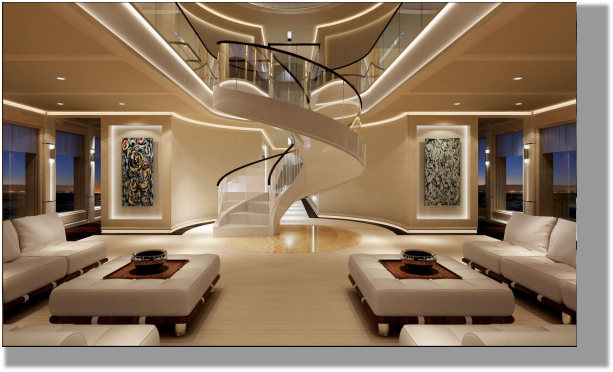

In [40]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

In [41]:
#Import data set
data = pd.read_csv('data\\kc_house_data.csv')

In [42]:
#Review dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1,1180,5650,1,NaN,0,...,7,1180,0.0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400.0,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000,2,1,770,10000,1,0,0,...,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000,4,3,1960,5000,1,0,0,...,7,1050,910.0,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000,3,2,1680,8080,1,0,0,...,8,1680,0.0,1987,0,98074,47.62,-122.05,1800,7503


In [43]:
data.shape

(21597, 21)

In [44]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [45]:
#clear dataset and drop unnecessary column data
data.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'yr_renovated'], axis=1, inplace=True)

In [46]:
#create the column data
continuous = ['price', 'sqft_lot', 'sqft_living']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'condition','yr_built', 'zipcode', 'grade']
data_cont = data[continuous]

In [47]:
data.nunique()

price          3622
bedrooms         12
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
condition         5
grade            11
yr_built        116
zipcode          70
dtype: int64

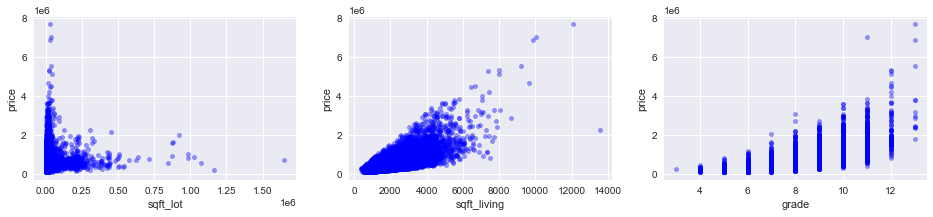

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'sqft_living', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

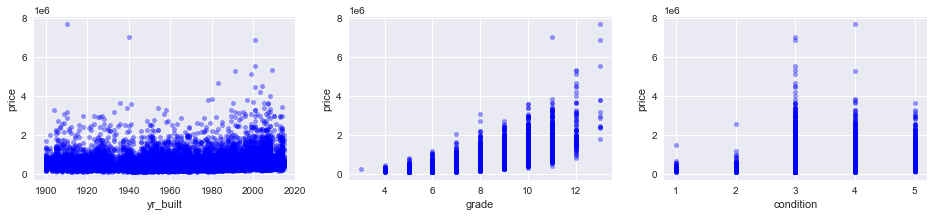

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip([ 'yr_built', 'grade', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

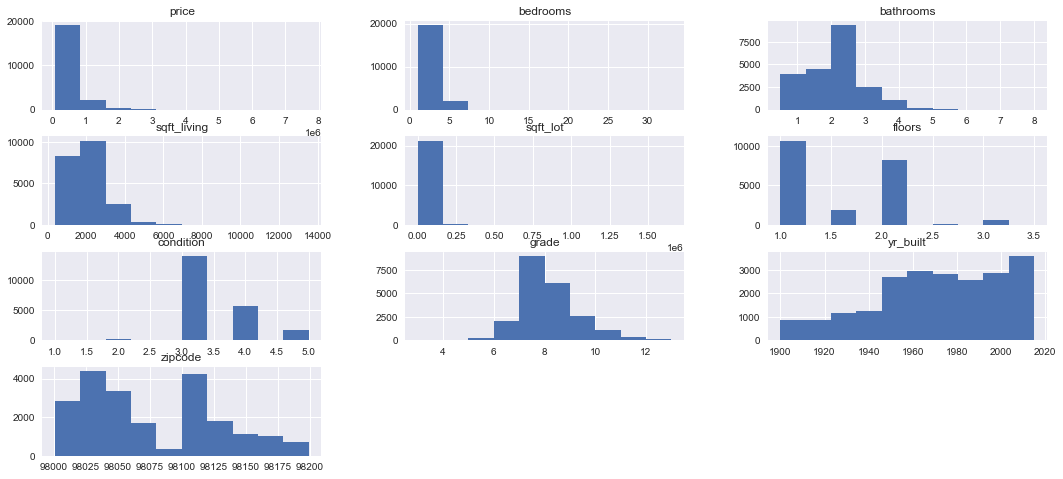

In [50]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
data.hist(ax = ax);

In [51]:
# log features
log_names = [f'{column}_log' for column in data_cont.columns]
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data_log = np.log(data_cont)
data_log.columns = log_names

In [52]:
# normalize continued features
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
data_log_norm = data_log.apply(normalize)

In [53]:
pd.get_dummies(data)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2.25,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3,3,8,2009,98103
21593,400000,4,2.50,2310,5813,2,3,8,2014,98146
21594,402101,2,0.75,1020,1350,2,3,7,2009,98144
21595,400000,3,2.50,1600,2388,2,3,8,2004,98027


In [54]:
data_ohe = pd.get_dummies(data[categoricals], drop_first=True)

In [55]:
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
preprocessed.head()

,price_log,sqft_lot_log,sqft_living_log,bedrooms,bathrooms,floors,condition,yr_built,zipcode,grade
0,-1.40,-0.39,-1.13,3,1,1,3,1955,98178,7
1,0.28,-0.11,0.71,3,2.25,2,3,1951,98125,7
2,-1.80,0.24,-2.13,2,1,1,3,1933,98028,6
3,0.50,-0.52,0.07,4,3,1,5,1965,98136,7
4,0.18,0.01,-0.29,3,2,1,3,1987,98074,8


In [56]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [57]:
outcome = 'price'
x_cols = ['grade', 'sqft_living', 'sqft_lot']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8295.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:11:38   Log-Likelihood:            -2.9911e+05
No. Observations:               21597   AIC:                         5.982e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.011e+05   1.33e+04    -45.074      0.000   -6.27e+05   -5.75e+05
grade        9.889e+04   2246.967     44.012      0.000    9.45e+04    1.03e+05
sqft_living   186.3532      2.896     64.344      0.000     180.676     192.030
sqft_lot       -0.2407      0.042     -5.760      0.000      -0.323      -0.159
==============================================================================
Omnibus:                    16895.228   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           991094.879
Skew:                           3.287   Prob(JB):                         0.00
Kurtosis:                      35.529   Cond. No.                     3.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

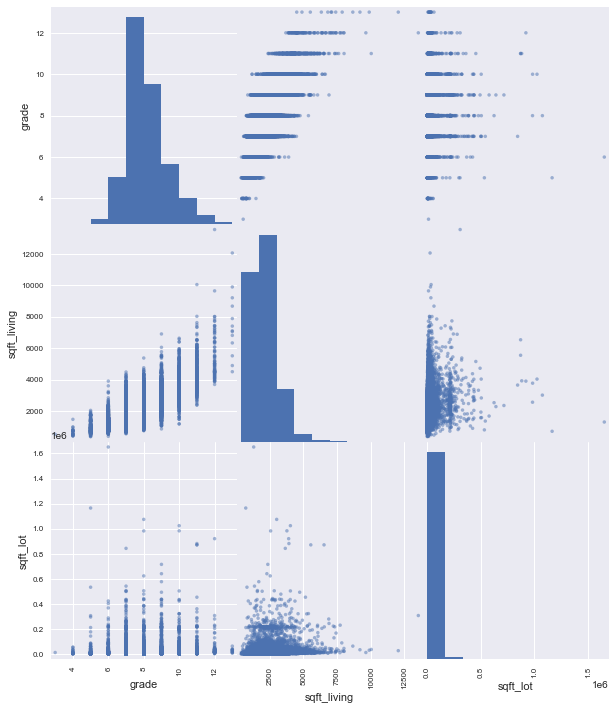

In [58]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

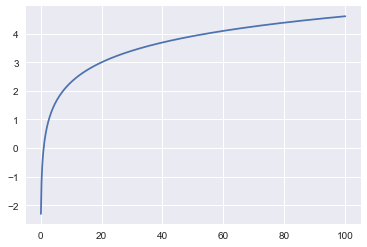

In [59]:
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

In [60]:
data_preds = data.drop('price', axis=1)
data_target = data['price']
data_preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,3,1,1180,5650,1,3,7,1955,98178
1,3,2.25,2570,7242,2,3,7,1951,98125
2,2,1,770,10000,1,3,6,1933,98028
3,4,3,1960,5000,1,5,7,1965,98136
4,3,2,1680,8080,1,3,8,1987,98074


In [61]:
#use sm,add_constant() to add constant term/y-intercept
predictors = sm.add_constant(data_preds)
predictors
#optimise betas adding another predictor intercept term = bo x const

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,1,3,1,1180,5650,1,3,7,1955,98178
1,1,3,2.25,2570,7242,2,3,7,1951,98125
2,1,2,1,770,10000,1,3,6,1933,98028
3,1,4,3,1960,5000,1,5,7,1965,98136
4,1,3,2,1680,8080,1,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...
21592,1,3,2.50,1530,1131,3,3,8,2009,98103
21593,1,4,2.50,2310,5813,2,3,8,2014,98146
21594,1,2,0.75,1020,1350,2,3,7,2009,98144
21595,1,3,2.50,1600,2388,2,3,8,2004,98027


In [62]:
model = sm.OLS(data_target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3880.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:11:39   Log-Likelihood:            -2.9700e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21587   BIC:                         5.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.328e+04   3.17e+06      0.023      0.982   -6.15e+06     6.3e+06
bedrooms    -4.886e+04   2127.161    -22.967      0.000    -5.3e+04   -4.47e+04
bathrooms    5.263e+04   3588.968     14.664      0.000    4.56e+04    5.97e+04
sqft_living   187.8342      3.426     54.824      0.000     181.119     194.550
sqft_lot       -0.2377      0.038     -6.194      0.000      -0.313      -0.162
floors       2.028e+04   3621.615      5.599      0.000    1.32e+04    2.74e+04
condition    2.028e+04   2601.136      7.795      0.000    1.52e+04    2.54e+04
grade        1.311e+05   2238.651     58.560      0.000    1.27e+05    1.35e+05
yr_built    -3954.9216     73.722    -53.647      0.000   -4099.422   -3810.422
zipcode        69.5884     31.814      2.187      0.029       7.231     131.946
==============================================================================
Omnibus:                    17321.831   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1210280.235
Skew:                           3.359   Prob(JB):                         0.00
Kurtosis:                      39.053   Cond. No.                     2.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
data_preds_scaled = (data_preds - np.mean(data_preds)) /np.std(data_preds)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)

In [64]:
data_preds_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,21597,21597,21597,21597,21597,21597,21597,21597,21597
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.56,-2.10,-1.86,-0.35,-0.92,-3.70,-3.97,-2.42,-1.44
25%,-0.40,-0.48,-0.71,-0.24,-0.92,-0.63,-0.56,-0.68,-0.84
50%,-0.40,0.17,-0.19,-0.18,0.01,-0.63,-0.56,0.14,-0.24
75%,0.68,0.50,0.51,-0.11,0.94,0.91,0.29,0.89,0.75
max,31.98,7.65,12.48,39.51,3.72,2.44,4.55,1.50,2.26


In [65]:
predictors = sm.add_constant(data_preds_scaled)
model = sm.OLS(data_target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3880.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:11:39   Log-Likelihood:            -2.9700e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21587   BIC:                         5.941e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.403e+05   1545.416    349.612      0.000    5.37e+05    5.43e+05
bedrooms    -4.525e+04   1970.341    -22.967      0.000   -4.91e+04   -4.14e+04
bathrooms    4.047e+04   2759.796     14.664      0.000    3.51e+04    4.59e+04
sqft_living  1.724e+05   3145.471     54.824      0.000    1.66e+05    1.79e+05
sqft_lot    -9844.1900   1589.325     -6.194      0.000    -1.3e+04   -6728.996
floors       1.094e+04   1954.478      5.599      0.000    7111.314    1.48e+04
condition    1.319e+04   1692.118      7.795      0.000    9874.150    1.65e+04
grade        1.538e+05   2626.324     58.560      0.000    1.49e+05    1.59e+05
yr_built    -1.162e+05   2165.543    -53.647      0.000    -1.2e+05   -1.12e+05
zipcode      3723.8038   1702.419      2.187      0.029     386.936    7060.672
==============================================================================
Omnibus:                    17321.831   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1210280.235
Skew:                           3.359   Prob(JB):                         0.00
Kurtosis:                      39.053   Cond. No.                         4.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Transforming dataset 
ss = StandardScaler()
ss.fit(data_preds)
data_preds_st_scaled = ss.transform(data_preds_scaled)

In [67]:
#boolean value declared
np.allclose(data_preds_st_scaled, data_preds_scaled)

False

In [68]:
#preview the predicted df
data_preds_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,-0.40,-1.45,-0.98,-0.23,-0.92,-0.63,-0.56,-0.54,1.87
1,-0.40,0.17,0.53,-0.19,0.94,-0.63,-0.56,-0.68,0.88
2,-1.48,-1.45,-1.43,-0.12,-0.92,-0.63,-1.41,-1.29,-0.93
3,0.68,1.15,-0.13,-0.24,-0.92,2.44,-0.56,-0.20,1.08
4,-0.40,-0.15,-0.44,-0.17,-0.92,-0.63,0.29,0.54,-0.07


In [69]:
#obtaining statistic values of target mean
data_target.mean()

540296.5735055795

In [70]:
#created array 
data_preds_st_scaled[:5, :]

array([[-4.07664356e+00, -4.63856226e+00, -2.26700447e+00,
        -3.64622677e-01, -4.46503867e+00, -6.21002614e+00,
        -7.00554752e+00, -6.71174225e+01, -1.83279241e+03],
       [-4.07664356e+00, -2.52460998e+00, -2.26535536e+00,
        -3.64621749e-01, -1.03149188e+00, -6.21002614e+00,
        -7.00554752e+00, -6.71220582e+01, -1.83281092e+03],
       [-5.24215843e+00, -4.63856226e+00, -2.26749090e+00,
        -3.64620141e-01, -4.46503867e+00, -6.21002614e+00,
        -7.73211549e+00, -6.71429189e+01, -1.83284479e+03],
       [-2.91112870e+00, -1.25623861e+00, -2.26607907e+00,
        -3.64623056e-01, -4.46503867e+00, -1.48401687e+00,
        -7.00554752e+00, -6.71058332e+01, -1.83280708e+03],
       [-4.07664356e+00, -2.94740043e+00, -2.26641127e+00,
        -3.64621260e-01, -4.46503867e+00, -6.21002614e+00,
        -6.27897955e+00, -6.70803367e+01, -1.83282873e+03]])

In [71]:
#confirm lr to run
lr = LinearRegression()
lr.fit(data_preds_st_scaled, data_target)

LinearRegression()

In [72]:
#setting co-efficient array 
lr.coef_

array([-4.19174557e+04,  3.11190790e+04,  1.58321622e+08, -4.07664426e+08,
        5.90519890e+03,  8.58103632e+03,  1.80431342e+05, -3.41256111e+06,
        1.99267568e+05])

In [73]:
#calculating intercept data value 
lr.intercept_

348061654.01133776

In [74]:
#calculating linear regression score 
lr.score(data_preds_st_scaled, data_target)

0.6179675998938288

In [75]:
#validating though y^test
y_hat = lr.predict(data_preds_st_scaled)
y_hat

array([298603.03598171, 657505.59607589, 214886.76505136, ...,
       109614.32152653, 404282.31094038, 113634.37707627])

In [76]:
#find values for  array 
data_preds_st_scaled.shape

(21597, 9)

In [77]:
#staged array
base_pred = np.zeros(9).reshape(1, -1)
base_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [78]:
#predicted array
lr.predict(base_pred)

array([3.48061654e+08])

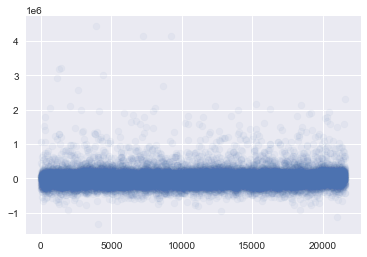

In [79]:
#Review y hat residual
y_hat = lr.predict(data_preds_st_scaled)
resid = (data_target - y_hat)

plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.05)

In [80]:
#overall metrics predicted data target metric to be .619 or 62%
metrics.r2_score(data_target, lr.predict(data_preds_st_scaled))

0.6179675998938288

In [81]:
#setting predictors location  
data_pred = data.iloc[:,0:12]
data_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2.25,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074


In [82]:
#visualse value of correlation percentage 
data_pred.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
price,1,0.31,0.53,0.70,0.09,0.26,0.04,0.67,0.05,-0.05
bedrooms,0.31,1,0.51,0.58,0.03,0.18,0.03,0.36,0.16,-0.15
bathrooms,0.53,0.51,1,0.76,0.09,0.50,-0.13,0.67,0.51,-0.20
sqft_living,0.70,0.58,0.76,1,0.17,0.35,-0.06,0.76,0.32,-0.20
sqft_lot,0.09,0.03,0.09,0.17,1,-0.00,-0.01,0.11,0.05,-0.13
floors,0.26,0.18,0.50,0.35,-0.00,1,-0.26,0.46,0.49,-0.06
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.26,1,-0.15,-0.36,0.00
grade,0.67,0.36,0.67,0.76,0.11,0.46,-0.15,1,0.45,-0.19
yr_built,0.05,0.16,0.51,0.32,0.05,0.49,-0.36,0.45,1,-0.35
zipcode,-0.05,-0.15,-0.20,-0.20,-0.13,-0.06,0.00,-0.19,-0.35,1


In [83]:
#check for connections 
abs(data_pred.corr()) >= 0.70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
price,True,False,False,True,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False
grade,False,False,False,True,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,False,True,False
zipcode,False,False,False,False,False,False,False,False,False,True


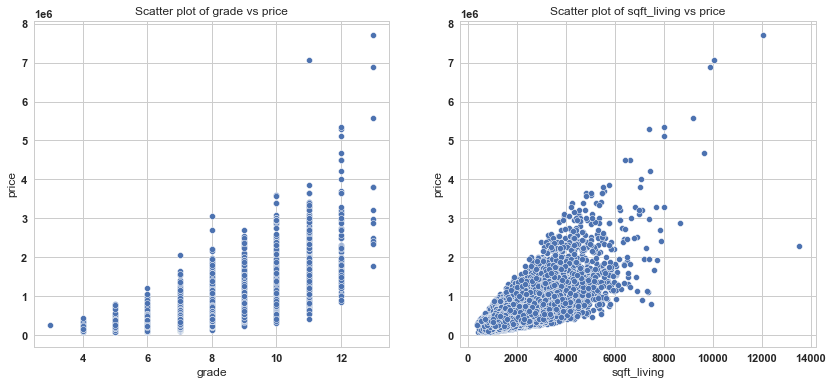

In [84]:
#Compare linearity between 2 variables for further analysis
sns.set_theme(color_codes=True)
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
data = pd.read_csv('data\\kc_house_data.csv')
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='grade',y='price',data=data,palette='Set1',ax=ax)
ax.set_title('Scatter plot of grade vs price')

ax = f.add_subplot(122)
sns.scatterplot(x='sqft_living',y='price',data=data,palette='viridis')
ax.set_title('Scatter plot of sqft_living vs price')
plt.savefig('sc.png');

In [85]:
#Cleaning data for prediction
data=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# combine the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
data['pairs'] = list(zip(data.level_0, data.level_1))
# set index to pairs
data.set_index(['pairs'], inplace = True)
#drop level columns
data.drop(columns=['level_1', 'level_0'], inplace = True)
# renamed correlation column to cc 
data.columns = ['cc']
# drop duplicates. 
data.drop_duplicates(inplace=True)

In [86]:
#quick preview to confirm 
data[(data.cc>=.70) & (data.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.76
"(sqft_living, bathrooms)",0.76
"(sqft_living, price)",0.70
